## Description of the Problem

I live in Nashville, Tennessee and will soon move to New York City, specifically Manhattan. I do not know which neighborhood I would like to live in, but I do know I would like to live in a neighborhood with close access to public transit and other ammenities such as restaurants, bars, music venues, and shops. 

The criteria I am searching for is something that is within one mile of a subway station and the rent is no more than $5,000 per month. 

## How the data will be used

I need to collect geospatial data and other descriptions for several fields: neighborhoods within Manhattan, subway stations, apartments and their monthly rent prices, and restaurants/venues in various neighborhoods.

Resources used:
    
    Neighborhoods in Manhattan: collect data similar to how neighborhood information was created in the "Clustering Toronto" lab. 
    
    Subway stations: Use of both Wikipedia and Google Maps to compile a "more complete" list of all of the subway stations.
    
        https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan
        
        https://www.google.com/maps/search/manhattan+subway+stations/@40.7837749,-74.0237901,12z/data=!3m1!4b1
        
    Apartments: RentManhattan.com is used, then use the filtered search results to create a .csv file that will be used to analyze apartments.
    
        https://www.realtor.com/apartments/Manhattan_NY/price-na-5000
        
        http://www.rentmanhattan.com/index.cfm?page=search&state=results
        
I will then use Foursquare data to map and cluster neighborhoods based on the criteria listed above. I may need to create several maps and cross-reference them to find a single answer, or maybe the five best locations. I plan to use tags so that the maps are more user-friendly and can be used for other cities, if necessary in the future.

In [5]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

## Generate Neighborhoods in Manhattan

### A CSV file was previously created in a lab with the Manhattan neighborhood location data. The following cell is importing that CSV so that it can be manipulated below.

In [6]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


### A CSV file was previously created with the most common venue in any given neighborhood. The following cell is importing that CSV so that it can be manipulated below.

In [7]:
body = client_ac213a5ca8f4450a85b509770841d6b2.get_object(Bucket='capstoneproject-donotdelete-pr-bpknnycifzn6zx',Key='Manhattan_Venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Manhattan_Venues = pd.read_csv(body)
df_Manhattan_Venues.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


### After loading the data for the most common type of venues in various Manhattan neighborhoods, a map can be created to visually explore this.

In [8]:
# Import numpy
import numpy as np # library to handle data in a vectorized manner
import time

In [9]:
# Import Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

In [4]:
# Import and install Nominatim and Folium
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [14]:
# Create a map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558 

kclusters = 6
Manhattan_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Manhattan_Venues['Latitude'], df_Manhattan_Venues['Longitude'], df_Manhattan_Venues['Neighborhood'], df_Manhattan_Venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 20,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(Manhattan_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(df_Manhattan['Latitude'], df_Manhattan['Longitude'], df_Manhattan['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Manhattan_clusters)    
    
       
Manhattan_clusters

### Now that a map is formed, I can visually explore Manhattan, but I want to explore a particular cluster and the venues nearby.

In [29]:
## Explore_Cluster is the cluster number to explore
## I chose cluster 3 because the map shows that cluster 3 is mostly located in mid-south Manhattan - an appealing location before performing too much analysis. 
## Cluster 3 is the "teal" color. An example is the Financial District Cluster at the southern tip of Manhattan
Explore_Cluster = 3
df_Manhattan_Venues.loc[df_Manhattan_Venues['Cluster Labels'] == Explore_Cluster, df_Manhattan_Venues.columns[[1] + list(range(5, df_Manhattan_Venues.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


## The map above clustered venues within different neighborhoods of Manhattan. I now want to understand where apartments are located within my price range.

### I have collected the data and saved it in two CSV files: one for the apartments and their prices, and one for the location of each apartment. I will load the apartment data below

In [32]:
body = client_ac213a5ca8f4450a85b509770841d6b2.get_object(Bucket='capstoneproject-donotdelete-pr-bpknnycifzn6zx',Key='Manhattan_Apartments.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Manhattan_Apartments = pd.read_csv(body)
df_Manhattan_Apartments.shape

(144, 8)

In [33]:
# df_Manhattan_Apartments.shape indicates that there are 144 apartments
df_Manhattan_Apartments.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


### I can collect the coordinates of each apartment using Nominatim

#### This is going to be shown below as a Markdown cell, but I will load the data from a CSV into the dataframe after that

for n in range(len(mh_rent)):
address= mh_rent['Address'][n] address=(mh_rent['Address'][n]+ ' , '+' Manhattan NY ') geolocator = Nominatim() location = geolocator.geocode(address) latitude = location.latitude longitude = location.longitude mh_rent['Lat'][n]=latitude mh_rent['Long'][n]=longitude

#print(n,latitude,longitude)
time.sleep(2)

print('Geodata completed')

In [38]:
body = client_ac213a5ca8f4450a85b509770841d6b2.get_object(Bucket='capstoneproject-donotdelete-pr-bpknnycifzn6zx',Key='Manhattan_Apartments_Location.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Manhattan_Apartments_Location = pd.read_csv(body)
df_Manhattan_Apartments_Location.shape

(144, 8)

In [39]:
# df_Manhattan_Apartments_Location.shape indicates that I have the same amount of rows and columns, now with the location data

df_Manhattan_Apartments_Location.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


## Now I can find the average price and square footage of apartments

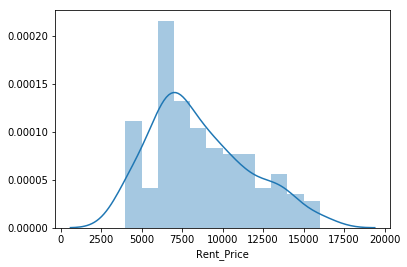

In [46]:
import seaborn as sns
sns.distplot(df_Manhattan_Apartments['Rent_Price'], bins = 12)

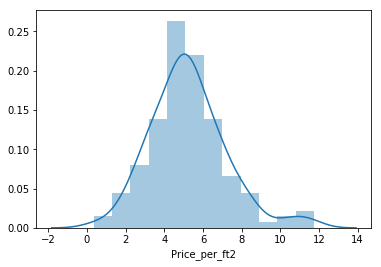

In [47]:
sns.distplot(df_Manhattan_Apartments['Price_per_ft2'], bins = 12)

In [52]:
Avg_price_apartment = sum(df_Manhattan_Apartments['Rent_Price'])/len(df_Manhattan_Apartments)
Avg_price_apartment

8569.118055555555

#### Maybe my 5,000 dollar per month budget is too small, I may need to rethink this depending on their location

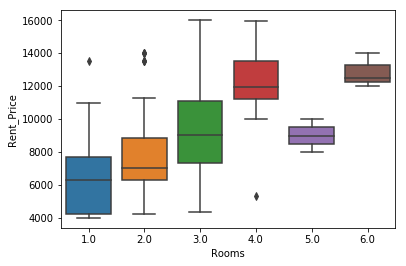

In [53]:
sns.boxplot(x = 'Rooms', y = 'Rent_Price', data = df_Manhattan_Apartments)

## Map the Manhattan apartments

In [55]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

Map_Manhattan_Apartments = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(df_Manhattan_Apartments_Location['Lat'], df_Manhattan_Apartments_Location['Long'],'$ ' + df_Manhattan_Apartments_Location['Rent_Price'].astype(str)+ ',  '+ df_Manhattan_Apartments_Location['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html=False).add_to(Map_Manhattan_Apartments) 
    
Map_Manhattan_Apartments

## Now that I have mapped the venues and apartments in Manhattan, I want one map to contain both sets of information

In [59]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

# create map with clusters
kclusters = 6
Manhattan_Both_Clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Manhattan_Venues['Latitude'], df_Manhattan_Venues['Longitude'], df_Manhattan_Venues['Neighborhood'], df_Manhattan_Venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 20,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(Manhattan_Both_Clusters)

# add markers to map for rental places
for lat, lng, label in zip(df_Manhattan_Apartments_Location['Lat'], df_Manhattan_Apartments_Location['Long'],'$ ' + df_Manhattan_Apartments_Location['Rent_Price'].astype(str)+ df_Manhattan_Apartments_Location['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Manhattan_Both_Clusters)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
Map_Manhattan_Apartments.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(Map_Manhattan_Apartments)

Manhattan_Both_Clusters

## Now I want to map the location of subway stations so I can compare that to apartments in the area and their proximity of the subway stations

### Just as before, I compiled a list of subway stations and their locations within the city. I will add that CSV file below

In [62]:
body = client_ac213a5ca8f4450a85b509770841d6b2.get_object(Bucket='capstoneproject-donotdelete-pr-bpknnycifzn6zx',Key='Manhattan_Subways.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Manhattan_Subways = pd.read_csv(body)
df_Manhattan_Subways.shape

(76, 4)

In [63]:
df_Manhattan_Subways.head()

,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [64]:
# removing duplicate rows and creating new set mhsub1
df_Manhattan_Subways=df_Manhattan_Subways.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
df_Manhattan_Subways.shape

(22, 4)

## Map of Manhattan subway stations

In [65]:
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

Map_Manhattan_Subways = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(df_Manhattan_Subways['lat'], df_Manhattan_Subways['long'],  df_Manhattan_Subways['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides = 6,
        radius = 6,
        popup = label,
        color = 'red',
        fill_color = 'red',
        fill_opacity = 2.5,
    ).add_to(Map_Manhattan_Subways)
    
Map_Manhattan_Subways

## Map of Manhattan with apartments and subway stations

In [66]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude = 40.7308619
longitude = -73.9871558

Map_Manhattan_Apartment_Subway = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(df_Manhattan_Apartments_Location['Lat'], df_Manhattan_Apartments_Location['Long'],'$ ' + df_Manhattan_Apartments_Location['Rent_Price'].astype(str)+ df_Manhattan_Apartments_Location['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html=False).add_to(Map_Manhattan_Apartment_Subway) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(df_Manhattan_Subways['lat'], df_Manhattan_Subways['long'],  df_Manhattan_Subways['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides = 6,
        radius = 6,
        popup = label,
        color = 'red',
        fill_color = 'red',
        fill_opacity = 2.5,
    ).add_to(Map_Manhattan_Apartment_Subway) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
Map_Manhattan_Apartment_Subway.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(Map_Manhattan_Apartment_Subway)

Map_Manhattan_Apartment_Subway

## Finally, I want to create one map with all the information on it

In [69]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

Map_Manhattan = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(df_Manhattan_Apartments_Location['Lat'], df_Manhattan_Apartments_Location['Long'],'$ ' + df_Manhattan_Apartments_Location['Rent_Price'].astype(str)+ ', '+df_Manhattan_Apartments_Location['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 6,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Map_Manhattan) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(df_Manhattan_Subways['lat'], df_Manhattan_Subways['long'],  df_Manhattan_Subways['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides = 6,
        radius = 6,
        popup = label,
        color = 'red',
        fill_color = 'red',
        fill_opacity = 2.5,
    ).add_to(Map_Manhattan) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Manhattan_Venues['Latitude'], df_Manhattan_Venues['Longitude'], df_Manhattan_Venues['Neighborhood'], df_Manhattan_Venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 15,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(Map_Manhattan)

    # Adds tool to the top right
from folium.plugins import MeasureControl
Map_Manhattan.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom = 5, left = 85).add_to(Map_Manhattan)

Map_Manhattan

## After creating the map, I can visually explore the neighborhoods and their amenities, the apartments available for rent, and the location of subway stations

### I am currently looking at an apartment near the Greenwich Village Cluster, which is part of cluster 3. I will continue the analysis with cluster = 3. The apartment costs 6,000 dollars per month, and while that is more expensive than my budget inially 

In [71]:
## Explore_Cluster is the cluster number to explore
Explore_Cluster = 3
df_Manhattan_Venues.loc[df_Manhattan_Venues['Cluster Labels'] == Explore_Cluster, df_Manhattan_Venues.columns[[1] + list(range(5, df_Manhattan_Venues.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop
